In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

**Dataset**

In [166]:
df=pd.read_csv("/kaggle/input/ushealthinsurancedataset/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [167]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [168]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Perfect clean dataset!

In [169]:
# checking unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [170]:
# checking duplicate values
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [171]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [172]:
# rows, columns
df.shape

(1337, 7)

**Exploratory Data Analysis**

Check for outliers

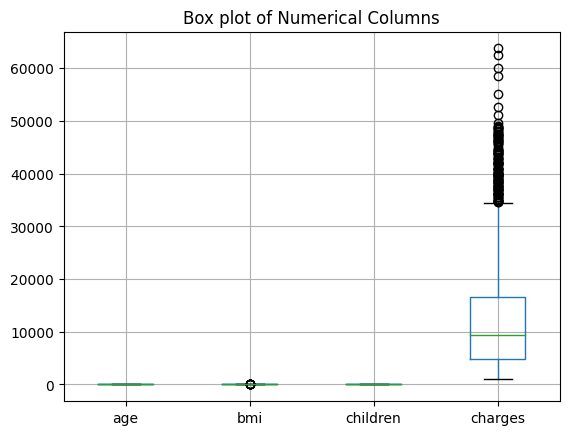

In [173]:
# Visualize box plots for numerical columns 
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [174]:
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000)]

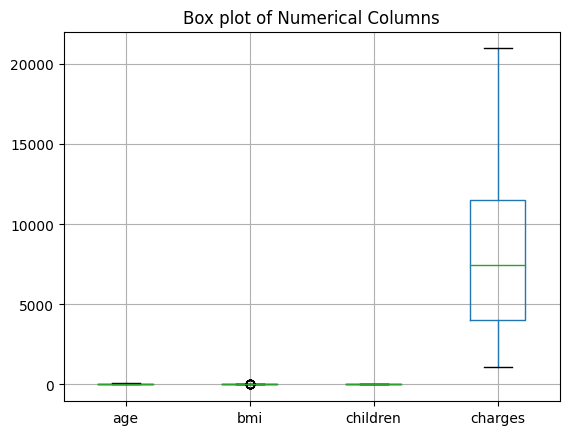

In [175]:
# visualize boxplot after removing outliers

df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [176]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1080.000000,1080.000000,1080.000000,1080.000000
mean,38.403704,30.289991,1.082407,8151.806356
std,13.935905,6.120169,1.223672,4918.345855
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.900000,0.000000,4038.478863
50%,38.000000,29.920000,1.000000,7442.572025
75%,50.000000,34.101250,2.000000,11523.793050
max,64.000000,53.130000,5.000000,20984.093600


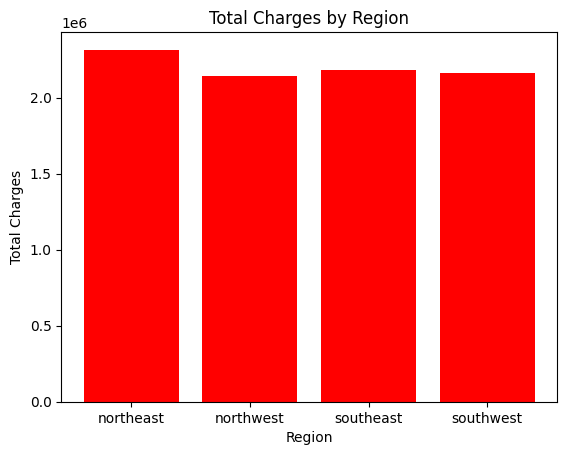

In [177]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create and show a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='red')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

plt.show()

In [178]:
# isolate and clean the smoker column with region as index
smokers_dist_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_dist_by_region.head()

smoker,no,yes
region,,
northeast,241,22
northwest,251,15
southeast,260,18
southwest,258,15


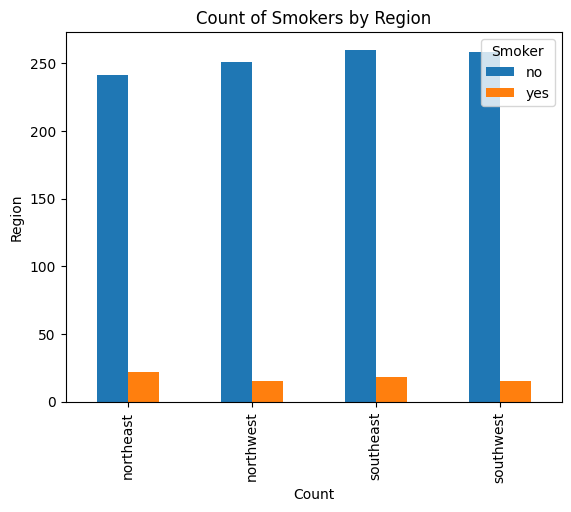

In [179]:
# plot smokers vs nonsmokers
smokers_dist_by_region.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

In [180]:
smokers_by_region.head()

smoker,yes
region,
northeast,22
northwest,15
southeast,18
southwest,15


In [181]:
# get array of total observations from each region
region_total = np.array(smokers_dist_by_region.sum(axis = 1))

# get array of total smokers by region
smokers_arr = np.array(smokers_dist_by_region['yes'])

# insert new column with percentage of smokers by region
smokers_dist_by_region['Smokers_by_Percent'] = smokers_arr / region_total  * 100

In [182]:
smokers_dist_by_region.head()

smoker,no,yes,Smokers_by_Percent
region,,,
northeast,241,22,8.365019
northwest,251,15,5.639098
southeast,260,18,6.474820
southwest,258,15,5.494505


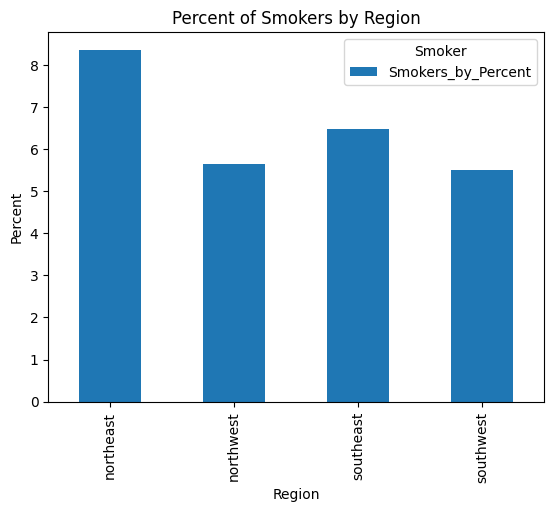

In [183]:
# visualizate smoker percent by region
smokers_dist_by_region['Smokers_by_Percent'].plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Percent')
plt.title('Percent of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

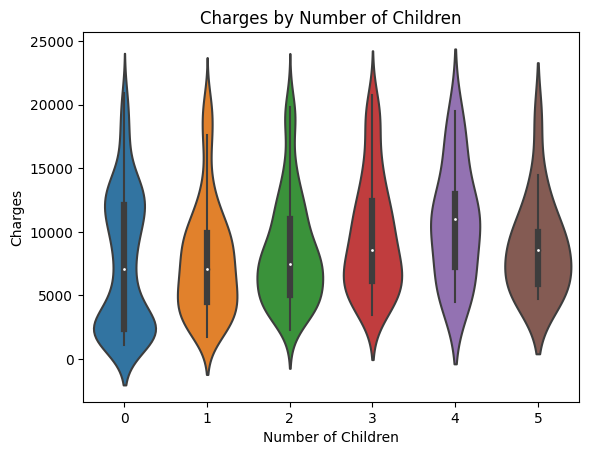

In [184]:
# Utilize violine plot to visualize distribution of relationship between charges and num children
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

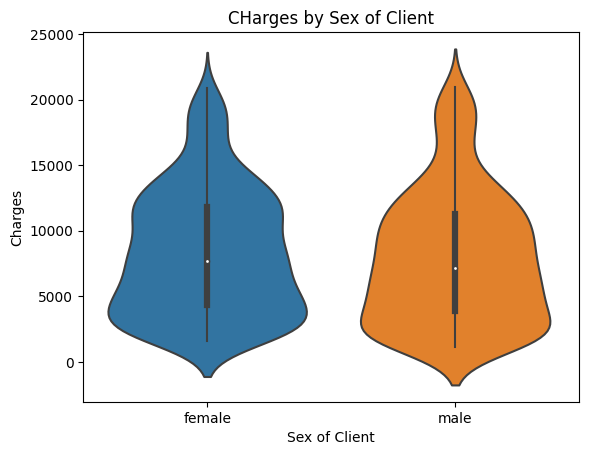

In [185]:
# Utilize violine plot to visualize distribution of relationship between charges and sex of client

sns.violinplot(x=df_cleaned['sex'], y=df_cleaned['charges'])

plt.xlabel('Sex of Client')
plt.ylabel('Charges')

plt.title('CHarges by Sex of Client')
plt.show()

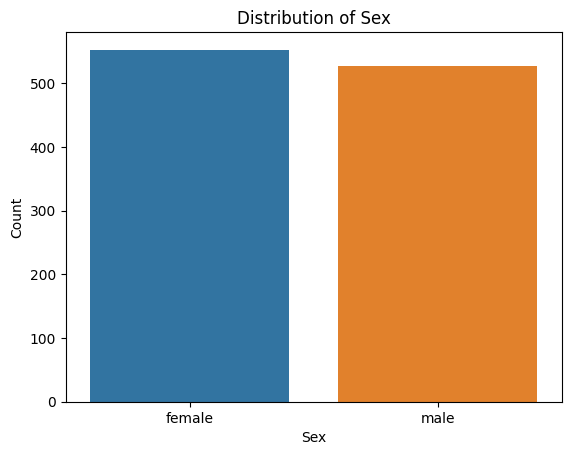

In [186]:
# plot distribution of sex of clients
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

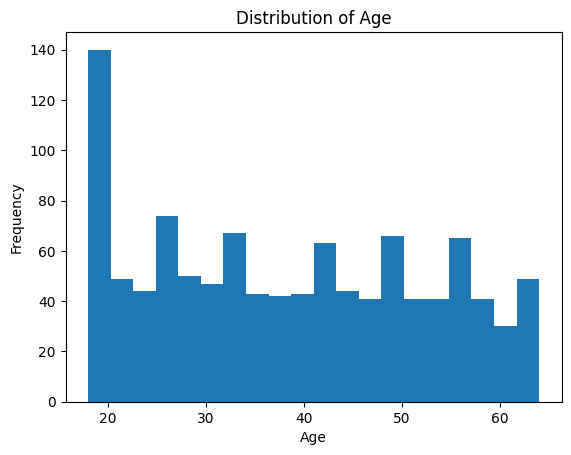

In [187]:
# plot age ditribution of clients
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

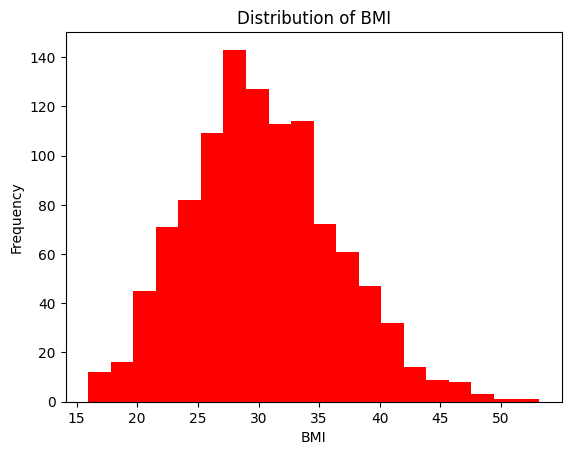

In [188]:
# plot BMI distribution of clients
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

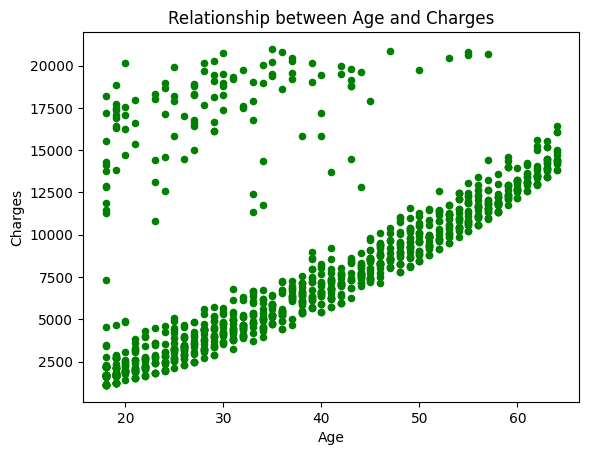

In [189]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

It looks like there are some outliers here but age does a good job at capturing the trend. Lets look at what other columns might impact the charges.

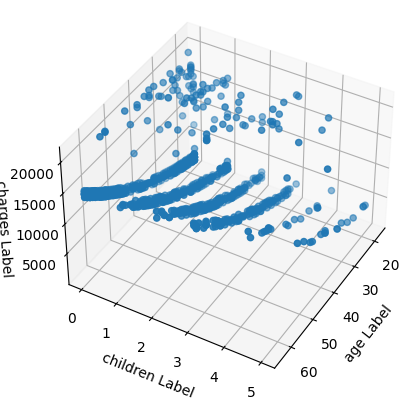

In [190]:
# relationship between age, children, and charges using 3d scatterplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=40, azim=30)

n = 100

xs = df_cleaned['age']
ys = df_cleaned['children']
zs = df_cleaned['charges']
ax.scatter(xs, ys, zs)

ax.set_xlabel('age Label')
ax.set_ylabel('children Label')
ax.set_zlabel('charges Label')

plt.show()


It doesn't look like chrildren has much of an impact due to the violin plot and this one.

In [191]:
# encode smoker column to numeric
le = LabelEncoder()
df_cleaned['smoker_encoded'] = le.fit_transform(np.array(df_cleaned['smoker']))
df_cleaned.head()

/tmp/ipykernel_32/1868922498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['smoker_encoded'] = le.fit_transform(np.array(df_cleaned['smoker']))


,age,sex,bmi,children,smoker,region,charges,smoker_encoded
0,19,female,27.90,0,yes,southwest,16884.9240,1
1,18,male,33.77,1,no,southeast,1725.5523,0
2,28,male,33.00,3,no,southeast,4449.4620,0
4,32,male,28.88,0,no,northwest,3866.8552,0
5,31,female,25.74,0,no,southeast,3756.6216,0


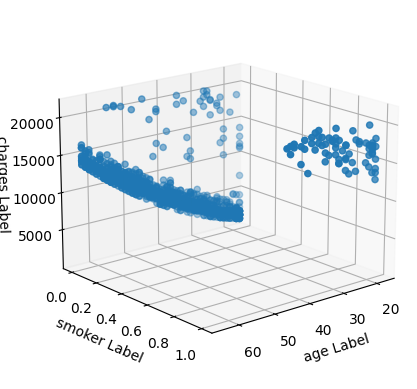

In [192]:
# relationship between age,smoker charges using 3d scatterplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=17, azim=50)

n = 100

xs = df_cleaned['age']
ys = df_cleaned['smoker_encoded']
zs = df_cleaned['charges']
ax.scatter(xs, ys, zs)

ax.set_xlabel('age Label')
ax.set_ylabel('smoker Label')
ax.set_zlabel('charges Label')

plt.show()

This is better, but doesn't capture al the outliers, maybe its due to a different varible? Lets try bmi.

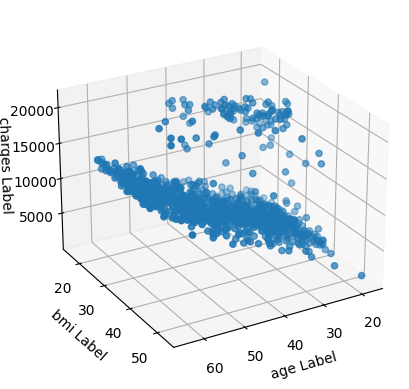

In [193]:
# relationship between age,bmi, and charges using 3d scatterplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25, azim=60)

n = 100
xs = df_cleaned['age']
ys = df_cleaned['bmi']
zs = df_cleaned['charges']
ax.scatter(xs, ys, zs)

ax.set_xlabel('age Label')
ax.set_ylabel('bmi Label')
ax.set_zlabel('charges Label')

plt.show()

it looks like some of our data points just can't be represented with our dataset?
Since our data can't model these datapoints it will only add error when building a model. So lets remove the data points that don't correlate with smokers. In the real world I would hunt for some more data that might capture these outliers.

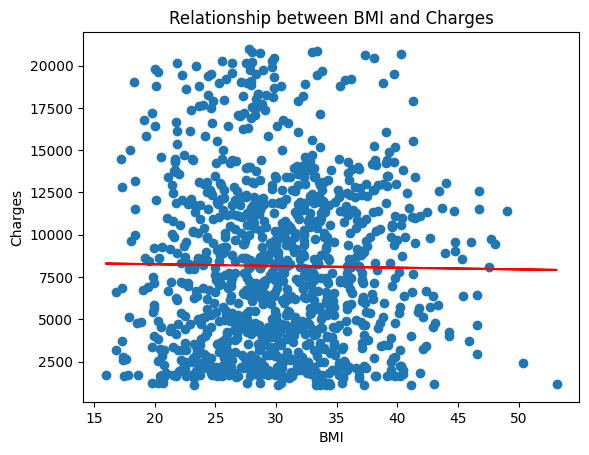

In [194]:

#plot linear regression line for BMI and scatter data
m, b = np.polyfit(df_cleaned['bmi'], df_cleaned['charges'], 1)


plt.plot(df_cleaned['bmi'], df_cleaned['charges'], 'o')
plt.plot(df_cleaned['bmi'], m*df_cleaned['bmi']+b, color = 'r')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.show()

Almost no correlation

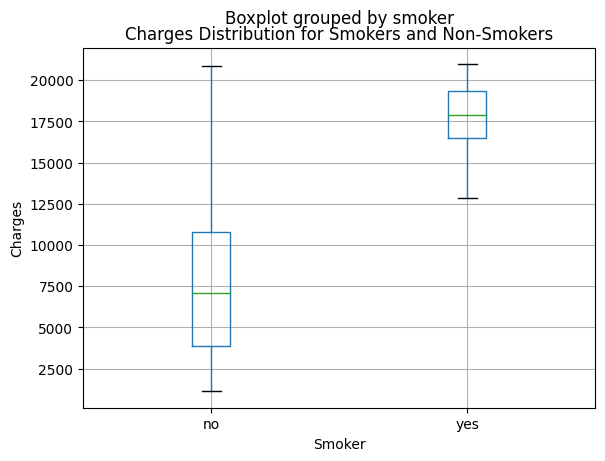

In [195]:
# charges distribution for smokers vs non-smokers using boxplot
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

Unsurprisingly, smokers are charged way higher than non-smokers

**Feature Engineering**

Creating new feature such as Age groups

**Feature encoding** - Handling categorical variables

One-hot encoding for the 'region' column

In [196]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
192,25,male,25.740,0,no,2137.65360,0,0,0,1,0
676,55,female,40.810,3,no,12485.80090,0,0,0,1,0
236,18,female,26.730,0,no,1615.76670,0,0,0,1,0
769,38,female,19.475,2,no,6933.24225,0,0,1,0,0
701,50,female,44.745,0,no,9541.69555,0,1,0,0,0


Label encoding for the 'smoker', 'sex' column

In [197]:
df_encoded['sex_encoded'] = le.fit_transform(df_encoded['sex'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest,sex_encoded
499,62,female,39.20,0,no,13470.8600,0,0,0,0,1,0
1004,47,male,19.19,1,no,8627.5411,0,1,0,0,0,1
118,49,female,27.17,0,no,8601.3293,0,0,0,1,0,0
501,43,male,26.03,0,no,6837.3687,0,1,0,0,0,1
446,60,male,29.64,0,no,12730.9996,0,1,0,0,0,1


In [198]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest,sex_encoded
1107,50,26.22,2,10493.9458,0,0,1,0,0,0
1333,50,30.97,3,10600.5483,0,0,1,0,0,1
1108,26,30.00,1,2904.0880,0,0,0,0,1,1
507,21,23.75,2,3077.0955,0,0,1,0,0,1
584,19,20.70,0,1242.8160,0,0,0,0,1,1


**Correlation Analysis**

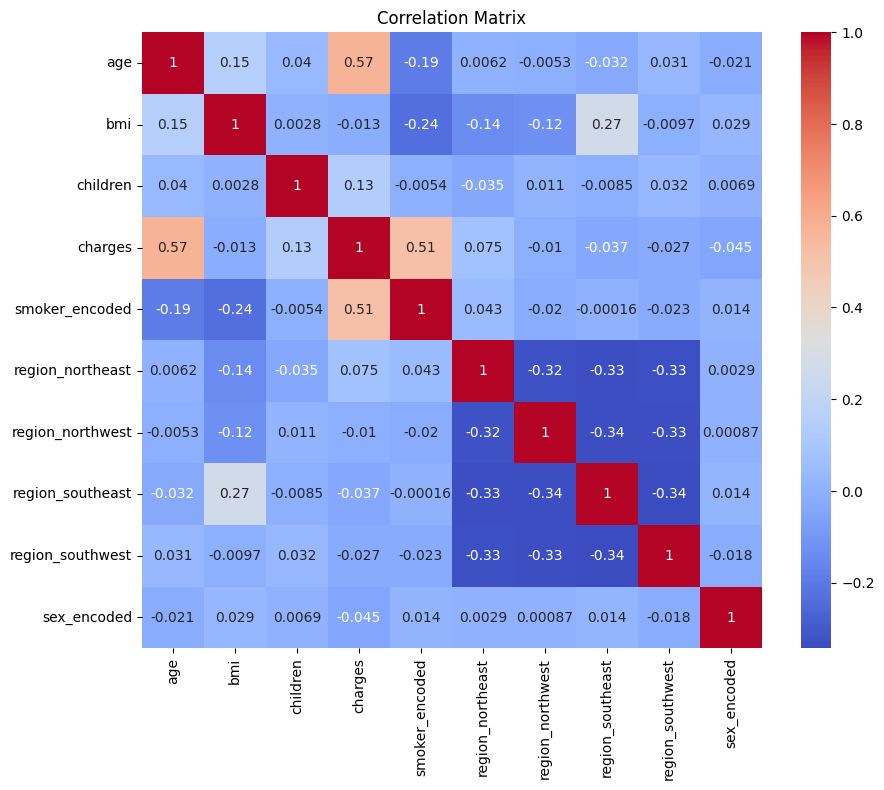

Relevant features based on correlation:
['age', 'children', 'smoker_encoded']


In [199]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]
corr_matrix = df_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.1
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist() 
print("Relevant features based on correlation:") 
print(relevant_features)

**Modelling**

In [200]:
# Select the relevant features
X = df_encoded[['age', 'smoker_encoded', 'children']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

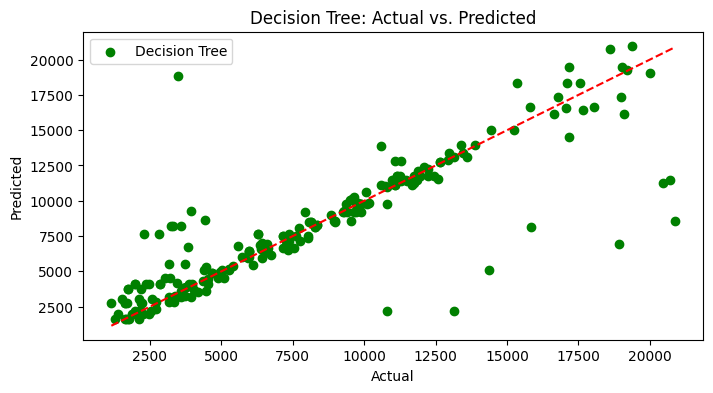

In [201]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

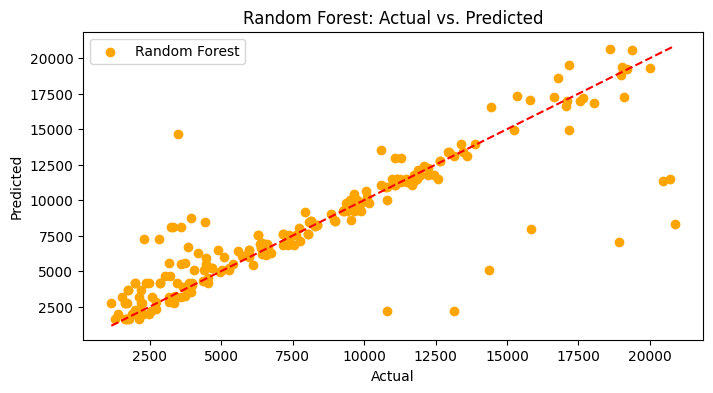

In [202]:

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

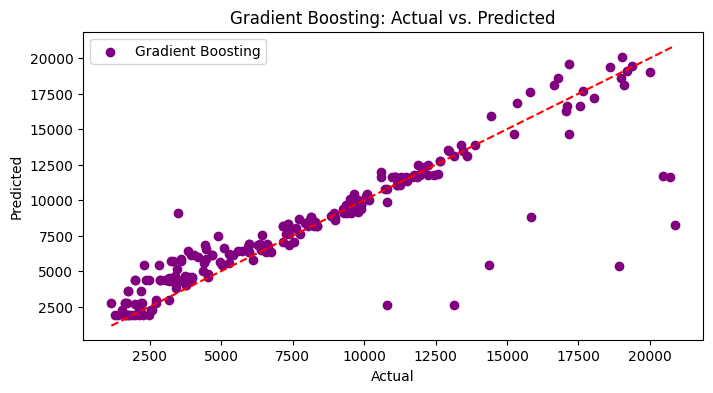

In [203]:

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

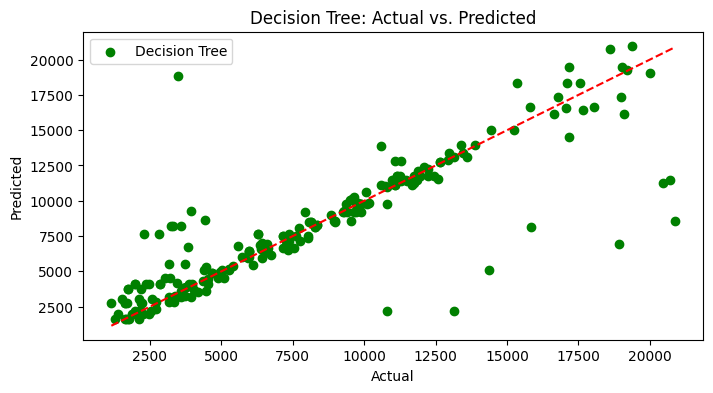

In [204]:
# KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = dt_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, knn_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [205]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)
print("KNN - MSE: ", knn_mse)
print("KNN - MAE: ", knn_mae)

Decision Tree - MSE:  6297370.612092913
Decision Tree - MAE:  1140.2468778582092
Random Forest - MSE:  5722521.071506514
Random Forest - MAE:  1122.3953102193495
Gradient Boosting - MSE:  4820824.0329173785
Gradient Boosting - MAE:  1075.8235564979614
KNN - MSE:  6297370.612092913
KNN - MAE:  1140.2468778582092


**Feature Importance**

In [206]:
# Decision Tree
print("Decision Tree:")

# Feature importances
importance = dt_model.feature_importances_ 

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}") 

print()

# Random Forest
print("Random Forest:")

# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns): 
    print(f"{feature}: {importance[i]}")

print()

# Gradient Boosting
print("Gradient Boosting:")

# Feature importances
importance = gb_model.feature_importances_ 
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")
    
print("KNN: no feature imporance metric")


Decision Tree:
age: 0.5011382300379662
smoker_encoded: 0.4307966322512094
children: 0.06806513771082438

Random Forest:
age: 0.5713871445055074
smoker_encoded: 0.3533176819900177
children: 0.0752951735044748

Gradient Boosting:
age: 0.4959542859663822
smoker_encoded: 0.45820693819327746
children: 0.0458387758403403
KNN: no feature imporance metric


Age has higher importance than smoking in all three models.

**Inference on sample data**